In [2]:
%reload_ext autoreload
%autoreload 2
import numpy as np
from milpsos import MILPSOS
import time
from multiprocessing import Process, Value, Array
import matplotlib.pyplot as plt

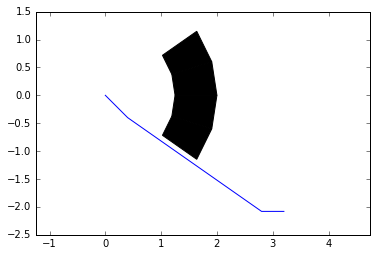

In [4]:
OA = MILPSOS()
obst_idx = [1,1,1,1,4]
x = Array('d', range(9))
y = Array('d', range(9))
traj, xm, ym = OA.MILP_compute_traj(obst_idx, x, y, 0.4, 0.4)
OA.plot_trajectory(traj, obst_idx)

In [22]:
# try whole procedure 
# first get some K, S values 
OA = MILPSOS()
K, S = OA.create_LQR()
rho = 0.1
# fix rho and V and find some u and lambda
lbda = OA.SOS_compute_1(S, rho)
print(lbda)
#fix V and lbda and optimize rho and find u 
rho, K = OA.SOS_compute_2(lbda, S)
print(rho)
#fix u and lbda and optimize rho and find V 
s, rho = OA.SOS_compute_3(K, lbda)
S = np.array([[s[0], s[1]], [s[2], s[3]]])
# V is a polynomial
print(rho)
dx, dy, rho_max = OA.get_dxdy(rho, S)
print(dx, dy, rho_max)
obst_idx = np.zeros(5)
# obst_idx[2:] = 1
obst_idx = [0,1,2,0,0]
x = Array('d', range(9))
y = Array('d', range(9))
traj, xm, ym = OA.MILP_compute_traj(obst_idx, x, y, dx, dy)
OA.plot_trajectory(traj, obst_idx)
OA.plot_trajectory(traj, obst_idx,x_margin=2*dx, y_margin=2*dy)
# find the largest theta 
theta = np.arctan(max((traj[1:,1] - traj[:-1,1])/(traj[1:,0] - traj[:-1,0])))
ym = ym*np.cos(theta)
OA.plot_trajectory(traj, obst_idx,x_margin=2*xm, y_margin=2*ym)
print(xm, ym)
S = OA.get_new_S(rho_max, xm, ym)
print("new S")
print(S)
#fix V and lbda and optimize rho and find u 
rho, K = OA.SOS_compute_4(lbda, S, rho)
print(rho)

print(rho, K)

RuntimeError: Formula ((x(0) * K(0)) <= 2.5) is non-linear.

In [15]:
# ang_discret=5, rng_discret=5 at most 3125 trajectories 
# saved datas 
l = 5**5
obst_array = np.zeros([l,5])
x_array = np.zeros([l,9])
y_array = np.zeros([l,9])
K_array = np.zeros([l,2])
m_array = np.zeros([l,2])
OA = MILPSOS()
i = 0
for a in range(5):
    for b in range(5):
        for c in range(5):
            for d in range(5):
                for e in range(5):
                    obst_idx = [a,b,c,d,e]
                    K, S = OA.create_LQR() # initialize
                    rho = 0.1 # initial guess
                    # fix rho and V and find some u and lambda
                    lbda = OA.SOS_compute_1(S, rho)
                    #fix V and lbda and optimize rho and find u 
                    rho, K = OA.SOS_compute_2(lbda, S)
                    #fix u and lbda and optimize rho and find V 
                    s, rho = OA.SOS_compute_3(K, lbda)
                    S = np.array([[s[0], s[1]], [s[2], s[3]]])
                    # V is a SOS poly
                    dx, dy, rho_max = OA.get_dxdy(rho, S)
                    x = Array('d', range(9))
                    y = Array('d', range(9))
                    # generate trajectory
                    traj, xm, ym = OA.MILP_compute_traj(obst_idx, x, y, dx, dy)
                    # find the largest theta 
                    theta = np.arctan(max((traj[1:,1] - traj[:-1,1])/(traj[1:,0] - traj[:-1,0])))
                    ym = ym*np.cos(theta)
                    S = OA.get_new_S(rho_max, xm, ym)
                    #fix V and lbda and optimize rho and find u (control law K)
                    rho, K = OA.SOS_compute_4(lbda, S, rho)
                    obst_array[i,:] = obst_idx[:]
                    x_array[i,:] = traj[:,0]
                    y_array[i,:] = traj[:,1]
                    K_array[i,:] = K[:]
                    m_array[i,0] = xm
                    m_array[i,1] = ym
                    i += 1
                    print("%s of 3125"%(str(i)))
np.savetxt('x.out', x_array, delimiter=',')
np.savetxt('y.out', y_array, delimiter=',')
np.savetxt('K.out', K_array, delimiter=',')
np.savetxt('obst.out', obst_array, delimiter=',')
np.savetxt('m.out', m_array, delimiter=',')
print("Done")

1 of 3125
2 of 3125
3 of 3125
4 of 3125
5 of 3125
6 of 3125
7 of 3125
8 of 3125
9 of 3125
10 of 3125
11 of 3125
12 of 3125
13 of 3125
14 of 3125
15 of 3125
16 of 3125
17 of 3125
18 of 3125
19 of 3125
20 of 3125
21 of 3125
22 of 3125
23 of 3125
24 of 3125
25 of 3125
26 of 3125
27 of 3125
28 of 3125
29 of 3125
30 of 3125
31 of 3125
32 of 3125
33 of 3125
34 of 3125
35 of 3125
36 of 3125
37 of 3125
38 of 3125
39 of 3125
40 of 3125
41 of 3125
42 of 3125
43 of 3125
44 of 3125
45 of 3125
46 of 3125
47 of 3125
48 of 3125
49 of 3125
50 of 3125
51 of 3125
52 of 3125
53 of 3125
54 of 3125
55 of 3125
56 of 3125
57 of 3125
58 of 3125
59 of 3125
60 of 3125
61 of 3125
62 of 3125
63 of 3125
64 of 3125
65 of 3125
66 of 3125
67 of 3125
68 of 3125
69 of 3125
70 of 3125
71 of 3125
72 of 3125
73 of 3125
74 of 3125
75 of 3125
76 of 3125
77 of 3125
78 of 3125
79 of 3125
80 of 3125
81 of 3125
82 of 3125
83 of 3125
84 of 3125
85 of 3125
86 of 3125
87 of 3125
88 of 3125
89 of 3125
90 of 3125
91 of 3125
92 of 31

693 of 3125
694 of 3125
695 of 3125
696 of 3125
697 of 3125
698 of 3125
699 of 3125
700 of 3125
701 of 3125
702 of 3125
703 of 3125
704 of 3125
705 of 3125
706 of 3125
707 of 3125
708 of 3125
709 of 3125
710 of 3125
711 of 3125
712 of 3125
713 of 3125
714 of 3125
715 of 3125
716 of 3125
717 of 3125
718 of 3125
719 of 3125
720 of 3125
721 of 3125
722 of 3125
723 of 3125
724 of 3125
725 of 3125
726 of 3125
727 of 3125
728 of 3125
729 of 3125
730 of 3125
731 of 3125
732 of 3125
733 of 3125
734 of 3125
735 of 3125
736 of 3125
737 of 3125
738 of 3125
739 of 3125
740 of 3125
741 of 3125
742 of 3125
743 of 3125
744 of 3125
745 of 3125
746 of 3125
747 of 3125
748 of 3125
749 of 3125
750 of 3125
751 of 3125
752 of 3125
753 of 3125
754 of 3125
755 of 3125
756 of 3125
757 of 3125
758 of 3125
759 of 3125
760 of 3125
761 of 3125
762 of 3125
763 of 3125
764 of 3125
765 of 3125
766 of 3125
767 of 3125
768 of 3125
769 of 3125
770 of 3125
771 of 3125
772 of 3125
773 of 3125
774 of 3125
775 of 3125
776 

1347 of 3125
1348 of 3125
1349 of 3125
1350 of 3125
1351 of 3125
1352 of 3125
1353 of 3125
1354 of 3125
1355 of 3125
1356 of 3125
1357 of 3125
1358 of 3125
1359 of 3125
1360 of 3125
1361 of 3125
1362 of 3125
1363 of 3125
1364 of 3125
1365 of 3125
1366 of 3125
1367 of 3125
1368 of 3125
1369 of 3125
1370 of 3125
1371 of 3125
1372 of 3125
1373 of 3125
1374 of 3125
1375 of 3125
1376 of 3125
1377 of 3125
1378 of 3125
1379 of 3125
1380 of 3125
1381 of 3125
1382 of 3125
1383 of 3125
1384 of 3125
1385 of 3125
1386 of 3125
1387 of 3125
1388 of 3125
1389 of 3125
1390 of 3125
1391 of 3125
1392 of 3125
1393 of 3125
1394 of 3125
1395 of 3125
1396 of 3125
1397 of 3125
1398 of 3125
1399 of 3125
1400 of 3125
1401 of 3125
1402 of 3125
1403 of 3125
1404 of 3125
1405 of 3125
1406 of 3125
1407 of 3125
1408 of 3125
1409 of 3125
1410 of 3125
1411 of 3125
1412 of 3125
1413 of 3125
1414 of 3125
1415 of 3125
1416 of 3125
1417 of 3125
1418 of 3125
1419 of 3125
1420 of 3125
1421 of 3125
1422 of 3125
1423 of 3125

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in divide


1571 of 3125
1572 of 3125
1573 of 3125
1574 of 3125
1575 of 3125
1576 of 3125
1577 of 3125
1578 of 3125
1579 of 3125
1580 of 3125
1581 of 3125
1582 of 3125
1583 of 3125
1584 of 3125
1585 of 3125
1586 of 3125
1587 of 3125
1588 of 3125
1589 of 3125
1590 of 3125
1591 of 3125
1592 of 3125
1593 of 3125
1594 of 3125
1595 of 3125
1596 of 3125
1597 of 3125
1598 of 3125
1599 of 3125
1600 of 3125
1601 of 3125
1602 of 3125
1603 of 3125
1604 of 3125
1605 of 3125
1606 of 3125
1607 of 3125
1608 of 3125
1609 of 3125
1610 of 3125
1611 of 3125
1612 of 3125
1613 of 3125
1614 of 3125
1615 of 3125
1616 of 3125
1617 of 3125
1618 of 3125
1619 of 3125
1620 of 3125
1621 of 3125
1622 of 3125
1623 of 3125
1624 of 3125
1625 of 3125
1626 of 3125
1627 of 3125
1628 of 3125
1629 of 3125
1630 of 3125
1631 of 3125
1632 of 3125
1633 of 3125
1634 of 3125
1635 of 3125
1636 of 3125
1637 of 3125
1638 of 3125
1639 of 3125
1640 of 3125
1641 of 3125
1642 of 3125
1643 of 3125
1644 of 3125
1645 of 3125
1646 of 3125
1647 of 3125

2202 of 3125
2203 of 3125
2204 of 3125
2205 of 3125
2206 of 3125
2207 of 3125
2208 of 3125
2209 of 3125
2210 of 3125
2211 of 3125
2212 of 3125
2213 of 3125
2214 of 3125
2215 of 3125
2216 of 3125
2217 of 3125
2218 of 3125
2219 of 3125
2220 of 3125
2221 of 3125
2222 of 3125
2223 of 3125
2224 of 3125
2225 of 3125
2226 of 3125
2227 of 3125
2228 of 3125
2229 of 3125
2230 of 3125
2231 of 3125
2232 of 3125
2233 of 3125
2234 of 3125
2235 of 3125
2236 of 3125
2237 of 3125
2238 of 3125
2239 of 3125
2240 of 3125
2241 of 3125
2242 of 3125
2243 of 3125
2244 of 3125
2245 of 3125
2246 of 3125
2247 of 3125
2248 of 3125
2249 of 3125
2250 of 3125
2251 of 3125
2252 of 3125
2253 of 3125
2254 of 3125
2255 of 3125
2256 of 3125
2257 of 3125
2258 of 3125
2259 of 3125
2260 of 3125
2261 of 3125
2262 of 3125
2263 of 3125
2264 of 3125
2265 of 3125
2266 of 3125
2267 of 3125
2268 of 3125
2269 of 3125
2270 of 3125
2271 of 3125
2272 of 3125
2273 of 3125
2274 of 3125
2275 of 3125
2276 of 3125
2277 of 3125
2278 of 3125

2833 of 3125
2834 of 3125
2835 of 3125
2836 of 3125
2837 of 3125
2838 of 3125
2839 of 3125
2840 of 3125
2841 of 3125
2842 of 3125
2843 of 3125
2844 of 3125
2845 of 3125
2846 of 3125
2847 of 3125
2848 of 3125
2849 of 3125
2850 of 3125
2851 of 3125
2852 of 3125
2853 of 3125
2854 of 3125
2855 of 3125
2856 of 3125
2857 of 3125
2858 of 3125
2859 of 3125
2860 of 3125
2861 of 3125
2862 of 3125
2863 of 3125
2864 of 3125
2865 of 3125
2866 of 3125
2867 of 3125
2868 of 3125
2869 of 3125
2870 of 3125
2871 of 3125
2872 of 3125
2873 of 3125
2874 of 3125
2875 of 3125
2876 of 3125
2877 of 3125
2878 of 3125
2879 of 3125
2880 of 3125
2881 of 3125
2882 of 3125
2883 of 3125
2884 of 3125
2885 of 3125
2886 of 3125
2887 of 3125
2888 of 3125
2889 of 3125
2890 of 3125
2891 of 3125
2892 of 3125
2893 of 3125
2894 of 3125
2895 of 3125
2896 of 3125
2897 of 3125
2898 of 3125
2899 of 3125
2900 of 3125
2901 of 3125
2902 of 3125
2903 of 3125
2904 of 3125
2905 of 3125
2906 of 3125
2907 of 3125
2908 of 3125
2909 of 3125

[ 0.  2.  2.  1.  0.]
[ 0.3        -0.01350756]


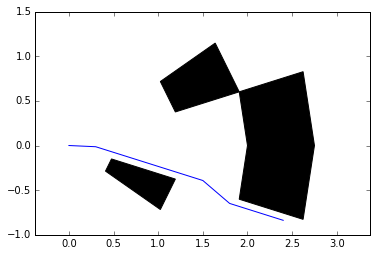

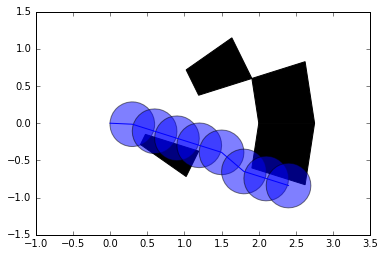

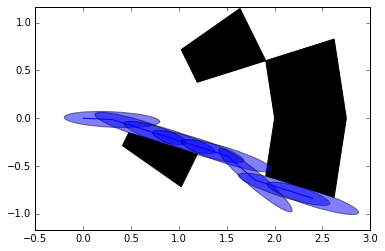

In [35]:
OA = MILPSOS()
x_array = np.loadtxt('traj/x.out', delimiter=',')
y_array = np.loadtxt('traj/y.out', delimiter=',')
obst_array = np.loadtxt('traj/obst.out', delimiter=',')
m_array = np.loadtxt('traj/m.out', delimiter=',')

idx = 305
x = x_array[idx,:]
y = y_array[idx,:]
obst_idx = obst_array[idx,:]
xm = m_array[idx,0]
ym = m_array[idx,1]
print(obst_idx)
traj = np.zeros([9,2])
traj[:,0] = x[:]
traj[:,1] = y[:]
print(traj[1,:])
OA.plot_trajectory(traj, obst_idx)
OA.plot_trajectory(traj, obst_idx, x_margin=2*0.3, y_margin=2*0.3)
OA.plot_trajectory(traj, obst_idx, x_margin=2*xm, y_margin=2*ym)

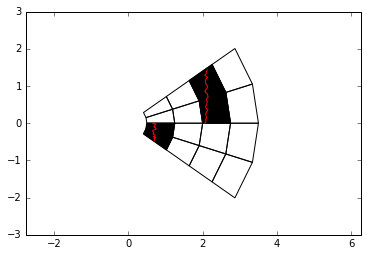

In [7]:
OA.plot_grid()